# HANDWRITTEN DIGITS DATASET

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import tkinter as tk

from ipywidgets import interact, widgets
from IPython.display import display
from tkinter import filedialog, messagebox, ttk
from sklearn.model_selection import train_test_split


# LOAD AND PREPARE DATA
Many of the datasets come from the Machine Learning Repository at the University of California, Irvine (UCI) at [https://archive.ics.uci.edu/](https://archive.ics.uci.edu/).

For all three demonstrations of dimensionality reduction, we'll use the "Optical Recognition of Handwritten Digits Data Set," which can be accessed via [https://j.mp/34NFNGn](https://j.mp/34NFNGn). We'll use the dataset saved in "optdigits.tra," which is the training dataset. 

## Import Data

- To read read the dataset from a local CSV file, run the following cell. (This is the recommended approach.)

In [2]:
address = pd.read_csv('../data/optdigits_raw.csv')

df = pd.DataFrame(address)

- Alternatively, to read the data from the UCI ML Repository, uncomment the lines in the cell below and run them.

In [3]:
# df = pd.read_csv(
#     'https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra', 
#     header=None)

- Check the data.

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


## Rename Variables

- Sequentially renames all attribute columns (i.e., pixel data) as `P0`, `P2`, etc.
- Renames the class variable as `y`.

In [5]:
df.columns = ["p" + str(i) for i in range(0, len(df.columns) - 1)] + ["y"]
df.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p55,p56,p57,p58,p59,p60,p61,p62,p63,y
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


## Select Cases

- Select cases for the digits {1, 2, 3}.
- Look at the first 5 rows.

In [6]:
df = df.loc[df.y.isin([1,2,3])]
df.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p55,p56,p57,p58,p59,p60,p61,p62,p63,y
5,0,0,11,16,10,1,0,0,0,4,...,3,0,0,10,16,16,16,16,6,2
11,0,0,0,3,16,11,1,0,0,0,...,0,0,0,0,2,14,14,1,0,1
14,0,0,7,11,11,6,0,0,0,9,...,0,0,0,14,16,12,10,1,0,3
24,0,0,9,13,1,0,0,0,0,0,...,5,0,0,4,15,16,16,16,16,1
25,0,0,9,16,11,0,0,0,0,4,...,1,0,0,10,16,9,9,13,6,2


## Split Data

- `train_test_split()` splits the data into training and testing sets.
- Specify the data matrix `X`, which contrains the attributes of the pixel data.
- Extract columns `P0`, `P2`, ..., `P63` with `df.filter(regex='\d')`, which will keep only names with a numeric digits in them.
- Specify the target variable as `df.y`.
- Create the `trn` and `tst` dataframes.

In [7]:
# Rename coluns
x_trn, x_tst, y_trn, y_tst = train_test_split(
    df.filter(regex=r'\d'),
    df.y,
    test_size=0.30,
    random_state=1
)

# Creates the tranining dataset, trn
trn = x_trn
trn['y'] = y_trn
trn
# Creates the testing dataset, tst
tst = x_tst
tst['y'] = y_tst


# EXPLORE TRAINING DATA

## Display Images
Display the images of the first 20 digits of `X_train`.

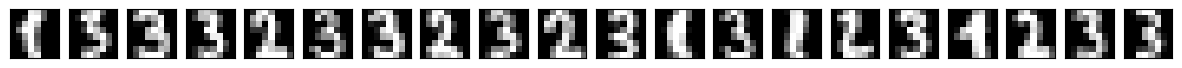

In [8]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=20,
    figsize=(15, 3.5),
    subplot_kw=dict(xticks=[], yticks=[])
)

for i in np.arange(20):
    ax[i].imshow(x_trn.to_numpy()[i, 0:-1].reshape(8, 8), cmap=plt.cm.gray)
plt.show()

## Explore Attribute Variables
Select four arbitrary features (any four will do) and get paired plots.

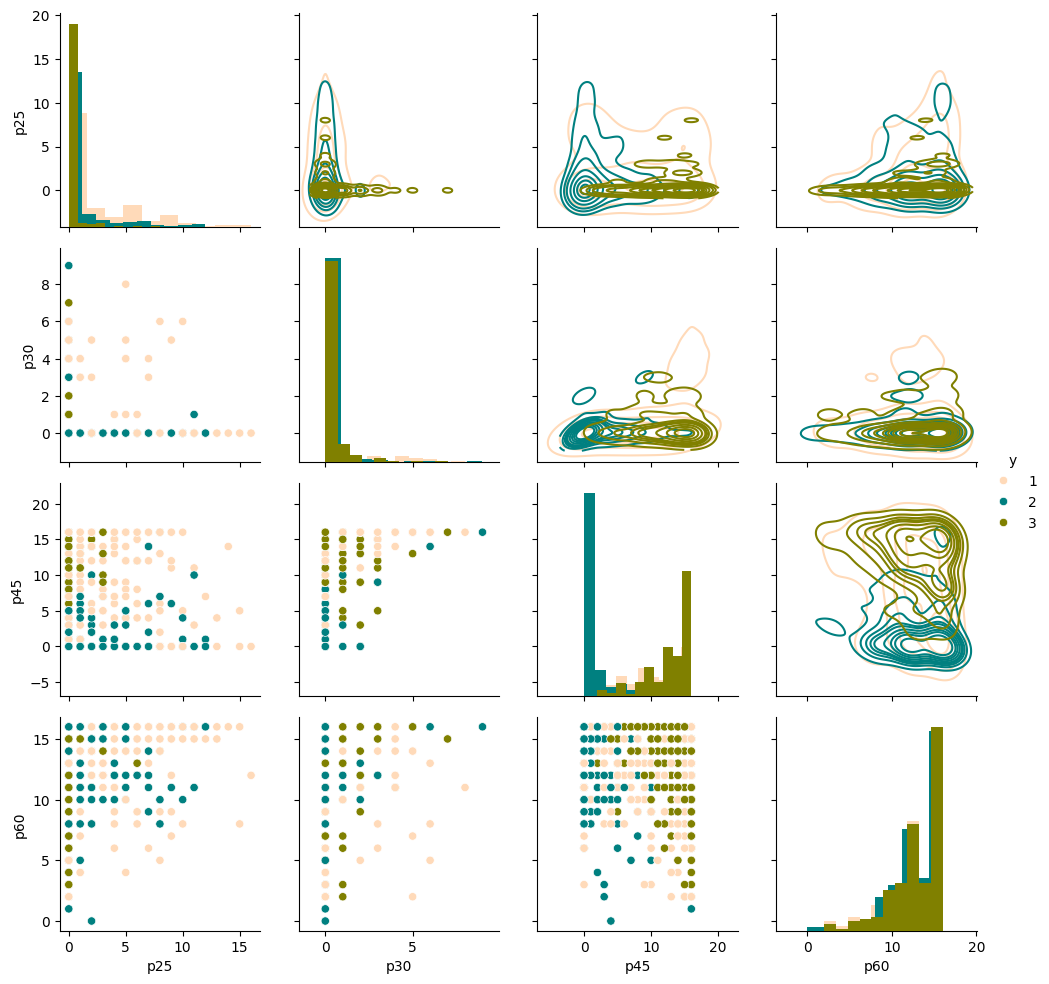

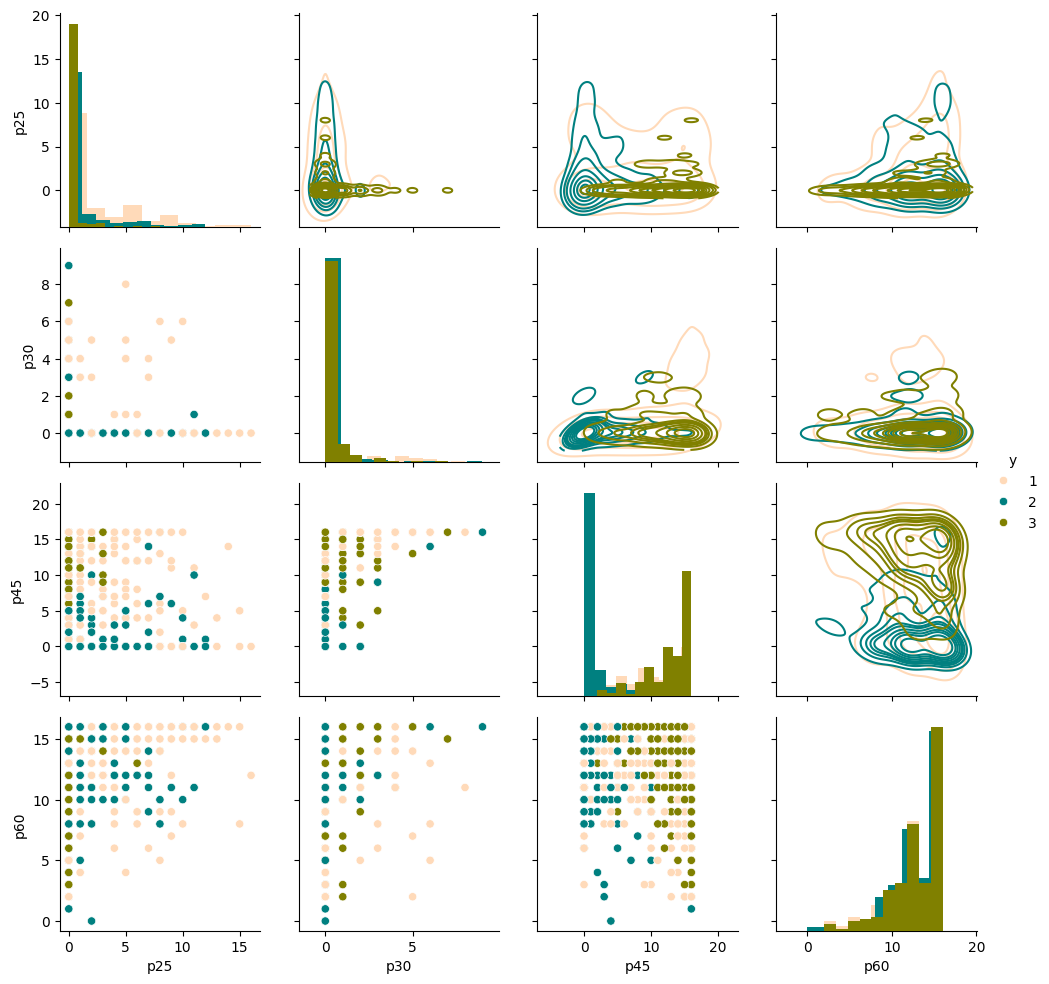

In [9]:
# Define the available image formats
IMAGE_FORMATS = ['.png', '.jpg', '.jpeg', '.pdf']

def create_plot():
    g = sns.PairGrid(
        trn,
        vars=["p25", "p30", "p45", "p60"],
        hue="y",
        diag_sharey=False,
        palette=['#FFDAB9', '#008080', '#808000']
    )

    g.map_diag(plt.hist)
    g.map_upper(sns.kdeplot)
    g.map_lower(sns.scatterplot)
    g.add_legend()

    return g

def display_plot():
    plot = create_plot()
    plt.show()

def display_and_save_plot(filename, image_format):
    plot = create_plot()

    # Save the plot as an image file with the specified format
    plot.savefig(filename + image_format)

def save_plot():
    filename = file_entry.get()
    selected_format = format_var.get()
    display_and_save_plot(filename, selected_format)

# Create the GUI window
root = tk.Tk()
root.title("Save Plot as Image")

# Create a label and entry for filename
file_label = ttk.Label(root, text="Filename:")
file_label.grid(row=0, column=0, padx=5, pady=5, sticky="e")
file_entry = ttk.Entry(root, width=30)
file_entry.grid(row=0, column=1, padx=5, pady=5)

# Create a dropdown for image format selection
format_label = ttk.Label(root, text="Image Format:")
format_label.grid(row=1, column=0, padx=5, pady=5, sticky="e")
format_var = tk.StringVar(value=IMAGE_FORMATS[0])
format_dropdown = ttk.Combobox(root, textvariable=format_var, values=IMAGE_FORMATS)
format_dropdown.grid(row=1, column=1, padx=5, pady=5)

# Create a button to display the plot
display_button = ttk.Button(root, text="Display Plot", command=display_plot)
display_button.grid(row=2, column=0, columnspan=2, padx=5, pady=5)

# Create a button to save the plot
save_button = ttk.Button(root, text="Save Plot", command=save_plot)
save_button.grid(row=3, column=0, columnspan=2, padx=5, pady=5)

root.mainloop()

# SAVE DATA
Save `df`, `trn`, and `tst` to CSV files to be used later.

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.